In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import thresholding 
from sklearn.metrics import jaccard_similarity_score
import scipy.ndimage as ndi
from parsing import parse_contour_file, poly_to_mask
import pandas as pd
import os
import cv2

/home/sahand/anaconda3/envs/medical/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)




After normalising the image intensity values, and suing dynamic thrsholding for each dicom I was able to generate masks with with average jaccard index of 84% for outer contours and 90% for the inner contours.

However due to similarity between density of the material in the myocardium region and I was not able to detect a meaningfull distinction between outer and inner boundries relying soly on pixel intensity.On a side note heart mucles and blood on average have the  densities of  1081kg/m³ and 1060 kg/M3.


I have created created few simple scripts to show my mask creation mechanism using thersholding and its jaccard index valuation in the following sections.





In [2]:

## creating a sample threshold 
sample_dicom = 'dicoms/SCD0000201/2.dcm'
image= imageio.imread(sample_dicom)
image = image.astype('uint8')
hist = ndi.histogram(image, min = 0, max = 255 , bins =256)
                        
cfd = hist.cumsum()/hist.sum()
                    
image = cfd[image]*255

sample_threshold = thresholding.threshold_otsu(image, nbins=256)
print(('sample_threshold = {}').format(sample_threshold))

sample_threshold = 163.83532986044884


wrong files!
wrong files!
59.dcm


<Figure size 432x288 with 0 Axes>

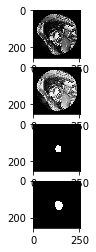

219.dcm


<Figure size 432x288 with 0 Axes>

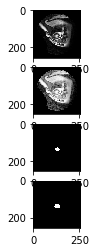

159.dcm


<Figure size 432x288 with 0 Axes>

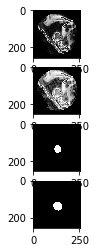

wrong files!
179.dcm


<Figure size 432x288 with 0 Axes>

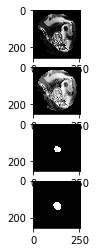

wrong files!
wrong files!
119.dcm


<Figure size 432x288 with 0 Axes>

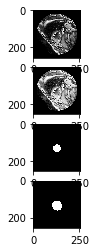

99.dcm


<Figure size 432x288 with 0 Axes>

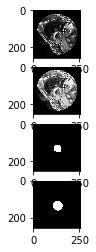

wrong files!
79.dcm


<Figure size 432x288 with 0 Axes>

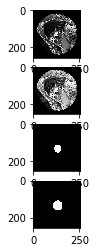

199.dcm


<Figure size 432x288 with 0 Axes>

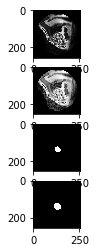

wrong files!
wrong files!
wrong files!
139.dcm


<Figure size 432x288 with 0 Axes>

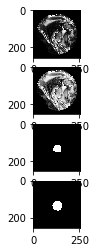

140.dcm


<Figure size 432x288 with 0 Axes>

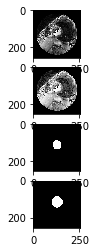

wrong files!
wrong files!
200.dcm


<Figure size 432x288 with 0 Axes>

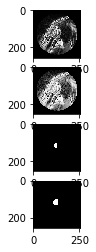

120.dcm


<Figure size 432x288 with 0 Axes>

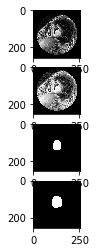

80.dcm


<Figure size 432x288 with 0 Axes>

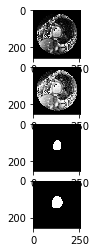

220.dcm


<Figure size 432x288 with 0 Axes>

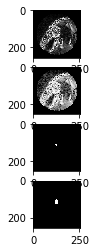

wrong files!
wrong files!
100.dcm


<Figure size 432x288 with 0 Axes>

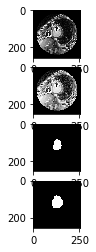

180.dcm


<Figure size 432x288 with 0 Axes>

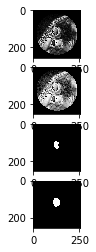

wrong files!
60.dcm


<Figure size 432x288 with 0 Axes>

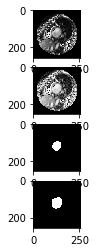

wrong files!
wrong files!
wrong files!
wrong files!
160.dcm


<Figure size 432x288 with 0 Axes>

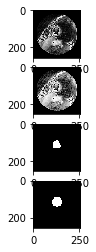

140.dcm


<Figure size 432x288 with 0 Axes>

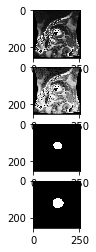

wrong files!
wrong files!
200.dcm


<Figure size 432x288 with 0 Axes>

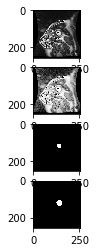

40.dcm


<Figure size 432x288 with 0 Axes>

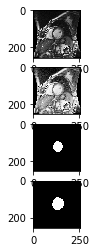

120.dcm


<Figure size 432x288 with 0 Axes>

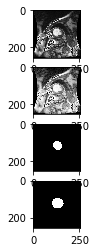

80.dcm


<Figure size 432x288 with 0 Axes>

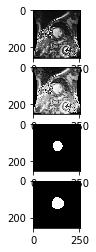

wrong files!
wrong files!
100.dcm


<Figure size 432x288 with 0 Axes>

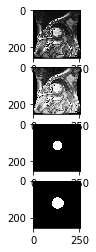

180.dcm


<Figure size 432x288 with 0 Axes>

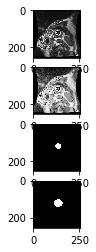

wrong files!
60.dcm


<Figure size 432x288 with 0 Axes>

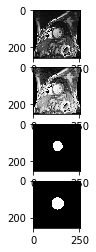

wrong files!
wrong files!
wrong files!
wrong files!
wrong files!
160.dcm


<Figure size 432x288 with 0 Axes>

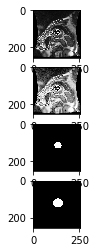

20.dcm


<Figure size 432x288 with 0 Axes>

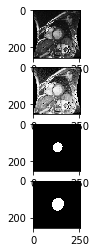

140.dcm


<Figure size 432x288 with 0 Axes>

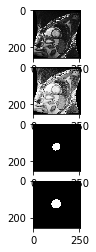

wrong files!
wrong files!
200.dcm


<Figure size 432x288 with 0 Axes>

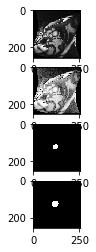

40.dcm


<Figure size 432x288 with 0 Axes>

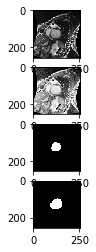

120.dcm


<Figure size 432x288 with 0 Axes>

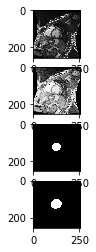

80.dcm


<Figure size 432x288 with 0 Axes>

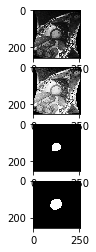

wrong files!
wrong files!
100.dcm


<Figure size 432x288 with 0 Axes>

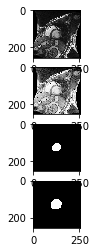

180.dcm


<Figure size 432x288 with 0 Axes>

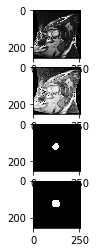

wrong files!
60.dcm


<Figure size 432x288 with 0 Axes>

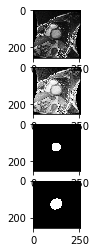

wrong files!
wrong files!
wrong files!
wrong files!
160.dcm


<Figure size 432x288 with 0 Axes>

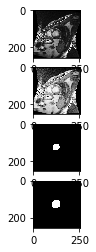

wrong files!
wrong files!
59.dcm


<Figure size 432x288 with 0 Axes>

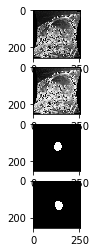

219.dcm


<Figure size 432x288 with 0 Axes>

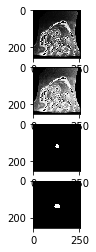

159.dcm


<Figure size 432x288 with 0 Axes>

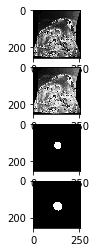

wrong files!
179.dcm


<Figure size 432x288 with 0 Axes>

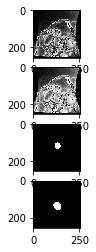

wrong files!
wrong files!
119.dcm


<Figure size 432x288 with 0 Axes>

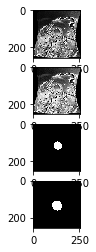

99.dcm


<Figure size 432x288 with 0 Axes>

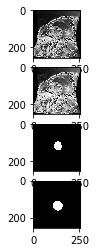

wrong files!
79.dcm


<Figure size 432x288 with 0 Axes>

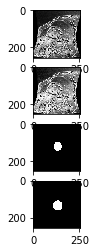

199.dcm


<Figure size 432x288 with 0 Axes>

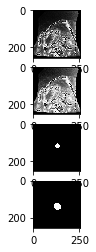

wrong files!
wrong files!
wrong files!
139.dcm


<Figure size 432x288 with 0 Axes>

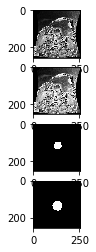

In [3]:
## plotting the given dicom files and their masks to see if I can spot any obvious visual visual clue regarding outer and inner masks

contour_path = 'contourfiles'
dicom_path= 'dicoms'
patient_id = pd.read_csv('link.csv')
for idx in range(len(patient_id)):
    path_i= os.path.join(contour_path,(patient_id['original_id'][idx]+'/i-contours/'))
    path_o= os.path.join(contour_path,(patient_id['original_id'][idx]+'/o-contours/'))
    path_d= os.path.join(dicom_path,patient_id['patient_id'][idx]+'/')
      
    for filename_o in os.listdir(path_o):
        try:
            if parse_contour_file(os.path.join(path_o,filename_o)):
                id = filename_o.split('-')[2]
                
                id_i = 'IM-0001-'+str(id)+'-icontour-manual.txt'
                
                id_o= 'IM-0001-'+str(id)+'-ocontour-manual.txt'
                
                if parse_contour_file(os.path.join(path_i,id_i)):
                    id_dicom = id.lstrip('0')+'.dcm'
                       
                    print(id_dicom)
               
                    dicom = imageio.imread(path_d+id_dicom)
                    dicom = dicom.astype('uint8')
                    hist = ndi.histogram(dicom, min = 0, max = 255 , bins =256)
                        
                    cfd = hist.cumsum()/hist.sum()
                    
                    dicom_equalized = cfd[dicom]*255

                    mask_o= poly_to_mask(parse_contour_file(path_o+'/'+id_o), 256, 256)
                 
                    mask_i= poly_to_mask(parse_contour_file(path_i+id_i), 256, 256)
                 
                    plt.figure()
                    fig, axes = plt.subplots(4,1)
                    
                    axes[0].imshow(dicom,  cmap= 'gray')
                    axes[1].imshow(dicom_equalized,  cmap= 'gray')
                    axes[2].imshow(mask_i ,  cmap= 'gray')
                    axes[3].imshow(mask_o,  cmap= 'gray')
                    plt.show() 
        except:
            print('wrong files!')
    

In [4]:
def make_mask_inner(image):
    #image = image.astype('uint8')
    #hist = ndi.histogram(image, min = 0, max = 255 , bins =256)

    #cfd = hist.cumsum()/hist.sum()
                    
    #image = cfd[image]*255
    mask = np.zeros_like(image)
    mask[100:160, 110:150] = image[100:160,110:150]
    threshold = thresholding.threshold_otsu(image[100:160,110:150], nbins=256)
    mask= mask> threshold

    mask=ndi.morphology.binary_erosion(mask,  iterations=1)
    mask=ndi.morphology.binary_opening(mask,  iterations=2)
    mask=ndi.morphology.binary_dilation(mask,  iterations=4)

    mask=ndi.morphology.binary_closing(mask,iterations=3)
    mask=ndi.morphology.binary_fill_holes(mask)
    
    return mask

In [5]:
#mask generating function using auto thresholding and few morphology operations
def make_mask_outer(image):
    #image = image.astype('uint8')
    #hist = ndi.histogram(image, min = 0, max = 255 , bins =256)

    #cfd = hist.cumsum()/hist.sum()
                    
    #image = cfd[image]*255
    mask = np.zeros_like(image)
    mask[100:160, 110:150] = image[100:160,110:150]
    threshold = thresholding.threshold_otsu(image[100:160,110:150], nbins=256)
    mask= mask<threshold

    #mask=ndi.morphology.binary_fill_holes(mask)
    #uter_mask =mask ^ make_mask_inner(image)

    

    mask=ndi.morphology.binary_erosion(mask,  iterations=5)
    #mask=ndi.morphology.binary_closing(mask,iterations=3)
    mask=ndi.morphology.binary_opening(mask,  iterations=3)
    mask=ndi.morphology.binary_closing(mask,iterations=4)
    mask=ndi.morphology.binary_dilation(mask,  iterations=2)
    mask=ndi.morphology.binary_erosion(mask,  iterations=2)
    
    mask[:10] = 1
    mask[-10:] = 1
    mask[:,:10] = 1
    mask[:,-10:] = 1
    mask = -1*mask
    return mask

<Figure size 432x288 with 0 Axes>

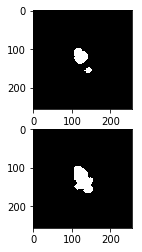

In [6]:
sample_dicom = 'dicoms/SCD0000201/2.dcm'
image= imageio.imread(sample_dicom)
inner_mask=make_mask_inner(image)
outer_mask=make_mask_outer(image)

plt.figure()
fig, axes = plt.subplots(2,1)
axes[0].imshow(inner_mask, cmap = 'gray')
axes[1].imshow(outer_mask, cmap = 'gray')



wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

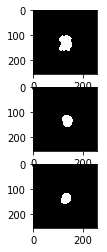

<Figure size 432x288 with 0 Axes>

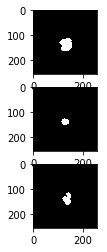

<Figure size 432x288 with 0 Axes>

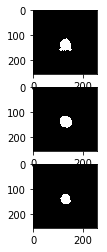

wrong files!


<Figure size 432x288 with 0 Axes>

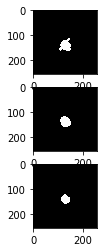

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

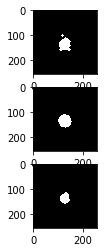

<Figure size 432x288 with 0 Axes>

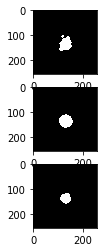

wrong files!


<Figure size 432x288 with 0 Axes>

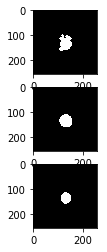

<Figure size 432x288 with 0 Axes>

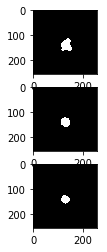

wrong files!
wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

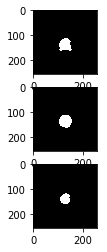

<Figure size 432x288 with 0 Axes>

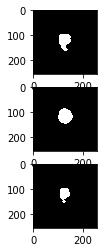

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

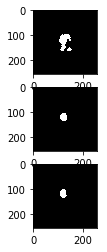

<Figure size 432x288 with 0 Axes>

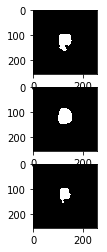

<Figure size 432x288 with 0 Axes>

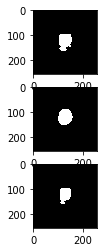

<Figure size 432x288 with 0 Axes>

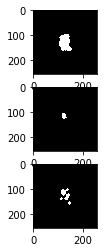

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

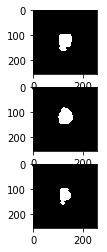

<Figure size 432x288 with 0 Axes>

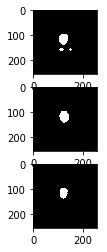

wrong files!


<Figure size 432x288 with 0 Axes>

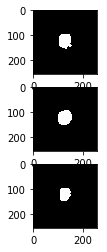

wrong files!
wrong files!
wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

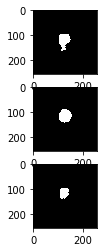

<Figure size 432x288 with 0 Axes>

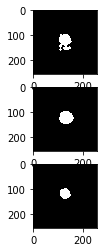

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

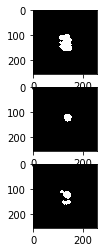

<Figure size 432x288 with 0 Axes>

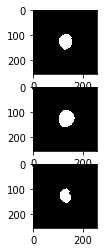

<Figure size 432x288 with 0 Axes>

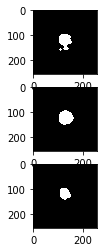

<Figure size 432x288 with 0 Axes>

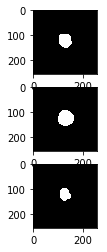

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

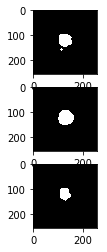

<Figure size 432x288 with 0 Axes>

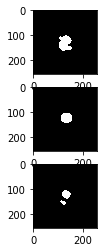

wrong files!


<Figure size 432x288 with 0 Axes>

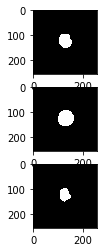

wrong files!
wrong files!
wrong files!
wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

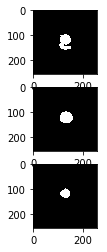

<Figure size 432x288 with 0 Axes>

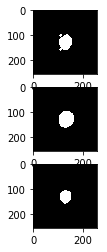

<Figure size 432x288 with 0 Axes>

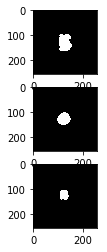

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

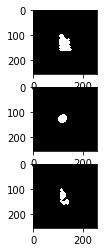

<Figure size 432x288 with 0 Axes>

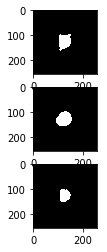

<Figure size 432x288 with 0 Axes>

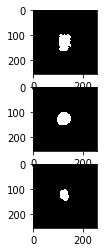

<Figure size 432x288 with 0 Axes>

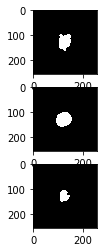

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

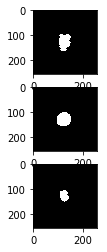

<Figure size 432x288 with 0 Axes>

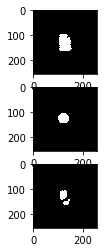

wrong files!


<Figure size 432x288 with 0 Axes>

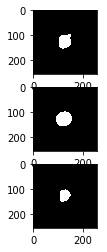

wrong files!
wrong files!
wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

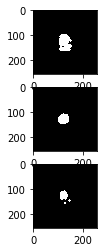

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

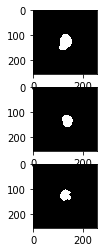

<Figure size 432x288 with 0 Axes>

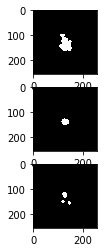

<Figure size 432x288 with 0 Axes>

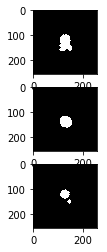

wrong files!


<Figure size 432x288 with 0 Axes>

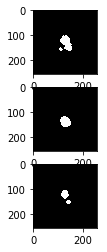

wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

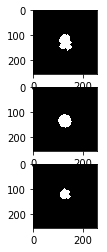

<Figure size 432x288 with 0 Axes>

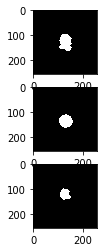

wrong files!


<Figure size 432x288 with 0 Axes>

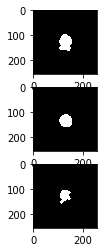

<Figure size 432x288 with 0 Axes>

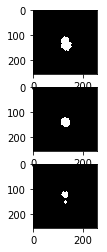

wrong files!
wrong files!
wrong files!


<Figure size 432x288 with 0 Axes>

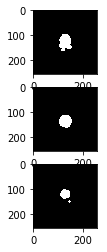

In [7]:
#parsing the dicom files and applying the created mask and comparing it to the given inner and outer masks

from sklearn.metrics import jaccard_similarity_score
contour_path = 'contourfiles'
dicom_path= 'dicoms'
patient_id = pd.read_csv('link.csv')

jaccard_i = []
jaccard_o = []

for idx in range(len(patient_id)):
    path_i= os.path.join(contour_path,(patient_id['original_id'][idx]+'/i-contours/'))
    path_o= os.path.join(contour_path,(patient_id['original_id'][idx]+'/o-contours/'))
    path_d= os.path.join(dicom_path,patient_id['patient_id'][idx]+'/')
      
    for filename_o in os.listdir(path_o):
        if filename_o[0] != '.':
            if parse_contour_file(os.path.join(path_o,filename_o)):
                id = filename_o.split('-')[2]
                
                id_i = 'IM-0001-'+str(id)+'-icontour-manual.txt'
                
                id_o= 'IM-0001-'+str(id)+'-ocontour-manual.txt'
                
                if parse_contour_file(os.path.join(path_i,id_i)):
                    id_dicom = id.lstrip('0')+'.dcm'
                       
               
                    dicom = imageio.imread(path_d+id_dicom)
                  
                    mask_o= poly_to_mask(parse_contour_file(path_o+id_o), 256, 256)
                 
                    mask_i= poly_to_mask(parse_contour_file(path_i+id_i), 256, 256)
                    
                    
                    mask_outer= make_mask_outer(dicom)
                    mask_inner=make_mask_inner(dicom)
            
                    jaccard_o.append(jaccard_similarity_score(mask_o, mask_outer))
                    jaccard_i.append(jaccard_similarity_score(mask_i, mask_inner))
                    
                    plt.figure()
                    fig, axes = plt.subplots(3,1)
                    axes[0].imshow(mask_outer, cmap = 'gray')
                    axes[1].imshow(mask_o, cmap = 'gray')
                    axes[2].imshow(mask_inner, cmap = 'gray')
                    plt.show()
                    
        else:
            print('wrong files!')
    

In [8]:
print(('Created mask jaccard index incomparison with Outer Contour: mean = {}, std = {}').format(np.mean(jaccard_o), np.std(jaccard_o)))

Created mask jaccard index incomparison with Outer Contour: mean = 0.006035814670546493, std = 0.004533912204137852


In [9]:
print(('Created mask jaccard index incomparison with Inner Contour: mean = {}, std = {}').format(np.mean(jaccard_i), np.std(jaccard_i)))


Created mask jaccard index incomparison with Inner Contour: mean = 0.9186375302804934, std = 0.043710267967851546


I beleive the best approach for creating inner and out masks is to use semantic segmentation using an ensemble of deep learning approchaes such as Unet, RCNN. Feature extraction using preptrained Convolutional neural networks such as Resnet, Inception, and VGG prior to application of semantic segmentation models can also increase performance. These models will be able to evaluate difference between inner and outer contours using features far beyond simple pixel intensity.

However I believe creating a highly accurate deep learning model requirs a larger dataset and data augmentation alone may not be enough. 


Created mask jaccard index incomparison with Outer Contour: mean = 0.006035814670546493, std = 0.004533912204137852


Created mask jaccard index incomparison with Inner Contour: mean = 0.9186375302804934, std = 0.043710267967851546
